## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
>調整參數會影響整個樹的結構，因此結果會變
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
#!pip install pydotplus

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [4]:
#LinearRegression
from sklearn.metrics import mean_squared_error

#建立一個線性回歸模型
lr = LinearRegression()

#餵資料學習
lr.fit(x_train, y_train)

#學習完成後,預測測試資料
y_pred = lr.predict(x_test)

#用 mean_squared_error 作為 loss function
mse = mean_squared_error(y_test, y_pred)

print("mse:", mse)

mse: 24.291119474973456


In [5]:
#DecisionTreeRegressor

#建立一個決策樹回歸模型
dtr = DecisionTreeRegressor()

#餵資料學習
dtr.fit(x_train, y_train)

#學習完成後,預測測試資料
y_pred = dtr.predict(x_test)

#用 mse 作為 loss function
mse = mean_squared_error(y_test, y_pred)

print("mse:", mse)

mse: 9.969411764705882


In [6]:
#DecisionTreeRegressor 調整參數

#建立一個決策樹回歸模型
dtr = DecisionTreeRegressor(
    criterion="mae",
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=3
)

#餵資料學習
dtr.fit(x_train, y_train)

#學習完成後,預測測試資料
y_pred = dtr.predict(x_test)

#用 mse 作為 loss function
mse = mean_squared_error(y_test, y_pred)

print("mse:", mse)

mse: 22.588137254901962


In [7]:
wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

In [8]:
#使用 LogisticRegression
from sklearn.metrics import accuracy_score
#建立 LogisticRegression 模型
lr = LogisticRegression()

#餵資料學習
lr.fit(x_train, y_train)

#預測測試資料結果
y_pred = lr.predict(x_test)

#用Accuracy來計算正確程度
acc = accuracy_score(y_test, y_pred)

print("acc:", acc)

acc: 0.9722222222222222


C:\Users\FGU\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FGU\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
# 使用 DecisionTreeClassifier

# 建立 DecisionTreeClassifier 模型
dtc = DecisionTreeClassifier()

#餵學習資料
dtc.fit(x_train, y_train)

#預測測試資料結果
y_pred = dtc.predict(x_test)

#用Accuracy來計算正確程度
acc = accuracy_score(y_test, y_pred)

print("acc:", acc)


acc: 0.8611111111111112


In [10]:
# 使用 DecisionTreeClassifier 調整參數

# 建立 DecisionTreeClassifier 模型
dtc = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=6
)

#餵學習資料
dtc.fit(x_train, y_train)

#預測測試資料結果
y_pred = dtc.predict(x_test)

#用Accuracy來計算正確程度
acc = accuracy_score(y_test, y_pred)

print("acc:", acc)

acc: 0.9444444444444444


C:\Users\FGU\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


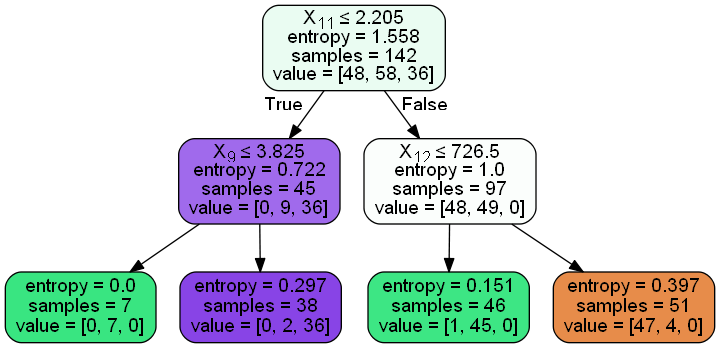

In [11]:
#用 graphviz 圖形化策略樹
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())